In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

In [2]:
#Reading kaggle dataset from csv file and assigning to a variable
dataset = pd.read_csv('Data.csv')

In [3]:
#Displaying first five records of the dataset
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#As per the dataset we can see that 33rd column named 'Unnamed: 32' is having all the Nan values so, we can drop it as it won't have any valid information for the prediction
dataset = dataset.dropna(axis=1) 
dataset #Printing the updated dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
#Printing coulmn names 
dataset.head().columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
#Printing shape of the dataset
dataset.shape

(569, 32)

In [7]:
#Finding all the descriptive statics values of mean, total number of records, standard deviation, minimum value, maximum value, 25, 50 and 75 percentiles of the dataset
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#Checking if now after removing last null columns still dataset have any null values or not
print(str('Any missing data or NaN in the dataset: '), dataset.isnull().values.any())

Any missing data or NaN in the dataset:  False


<AxesSubplot:>

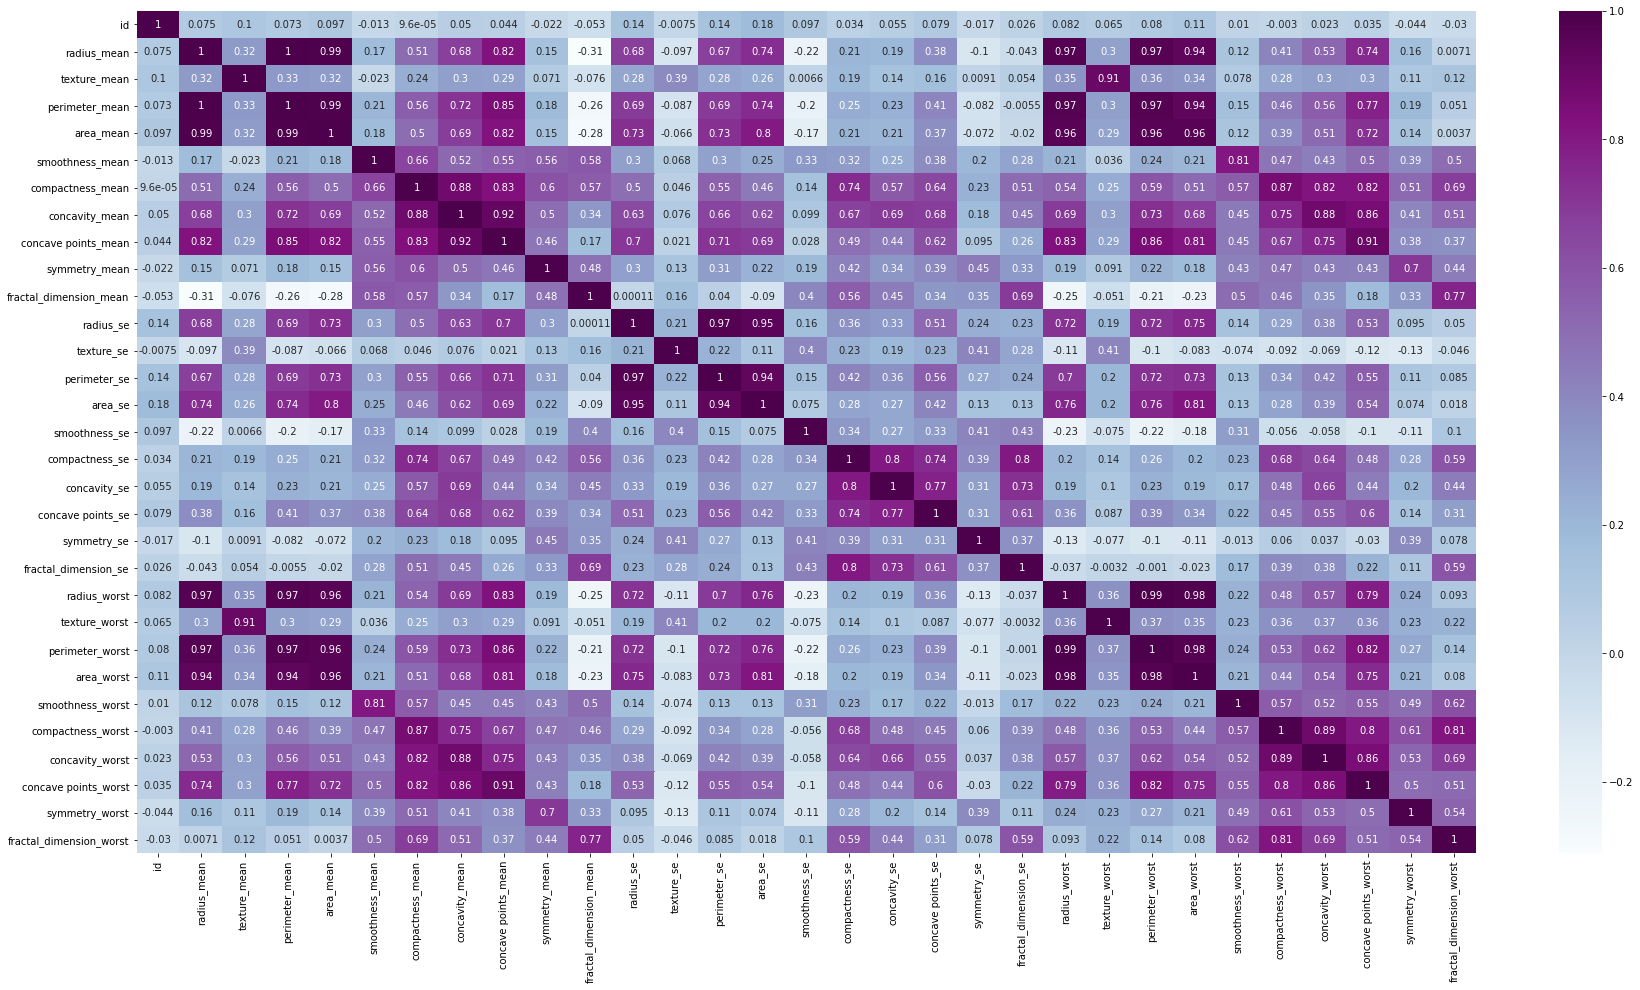

In [9]:
#Finding the correlation between each individual variables with each other
corr_var = dataset.corr()
plt.figure(figsize=(30,15.5)) ##Size of the heatmap for the correlation 
sns.heatmap(corr_var, annot=True, cmap='BuPu') #Prnting the heat map for the correlations 

In [10]:
#Assigning dependent and independent variables for the logistic regression
X = dataset.drop(['diagnosis'], axis=1) # Considering all the variables remaining after droping 'diagnosis' variable
y = dataset['diagnosis'].values #Creating array of y(dependent) variable
y #Printing y variable

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [11]:
#Imporing label encoder for encoding the Y(dependent) variable in 0 and 1 as having data type as object
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #assigning to a variable 

In [12]:
#Counting M and B value counts in the dependent variable
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
#training label encoder with y values
le.fit(y)

LabelEncoder()

In [14]:
# Checking the classes of M and B in the label encoder
le.classes_

array(['B', 'M'], dtype=object)

In [15]:
# Checking the values assigned to the values in y variable
le.transform(['M','B'])

array([1, 0])

In [16]:
#Updating 0 & 1 values of y variable 
y = le.transform(y)

In [17]:
#Spliting dataset in training and test data as 80:20 ratio 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Printing the number of samples assigned to traning and tet data for dependent and indepedent variables
print('Total no. of samples: Training and Testing dataset separately!')
print('  X_train:  ', np.shape(X_train))
print('  y_train:  ', np.shape(y_train))
print('  X_test:   ', np.shape(X_test))
print('  y_test:   ', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
  X_train:   (455, 31)
  y_train:   (455,)
  X_test:    (114, 31)
  y_test:    (114,)


In [18]:
#Printing X_train dataset
X_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,897880,10.050,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,...,11.160,26.84,71.98,384.0,0.14020,0.14020,0.1055,0.06499,0.2894,0.07664
427,90745,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,...,12.760,32.04,83.69,489.5,0.13030,0.16960,0.1927,0.07485,0.2965,0.07662
406,905189,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,...,17.710,19.58,115.90,947.9,0.12060,0.17220,0.2310,0.11290,0.2778,0.07012
96,86211,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,...,12.830,20.92,82.14,495.2,0.11400,0.09358,0.0498,0.05882,0.2227,0.07376
490,91376701,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,...,14.170,31.99,92.74,622.9,0.12560,0.18040,0.1230,0.06335,0.3100,0.08203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,8911670,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737
9,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
359,901034301,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136
192,875099,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559


In [20]:
#As we can see from above dataset that the records are not similar to each other so, we won't be able to give as it is to our model otherwise our model can perform bias on 
#basis of the higher values
sc = StandardScaler() #Assigning a variable the scaling method # Standardize features by removing the mean and scaling to unit variance
#Assigning fitted data and then transposing it
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #transform method - Perform standardization by centering and scaling

In [21]:
#Calling logisting function and assigning it to our model
lr = LogisticRegression()
lr.fit(X_train, y_train) #fitting and training the model with traning values

LogisticRegression()

In [22]:
#Creating y_pred variable as model is predicting values with help of X-test data 
y_pred = lr.predict(X_test)

In [24]:
#Creating a and b variables by reshaping the len of the predicted and test dependent variable
a = np.reshape(len(y_pred),1)
b = np.reshape(len(y_test),1)

In [25]:
#Printing the arrays of the y_pred and y_test to check if it is equal or not
print(np.concatenate((a, b),0)) #concatenate method- Join a sequence of arrays along an existing axis.

[114 114]


In [26]:
#Evaluating the accuracy of the matirx using confusion matrix
#Creating a variable cm and assigning the confusion matrix values with help of y-test and y_pred data
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  2]
 [ 2 45]]


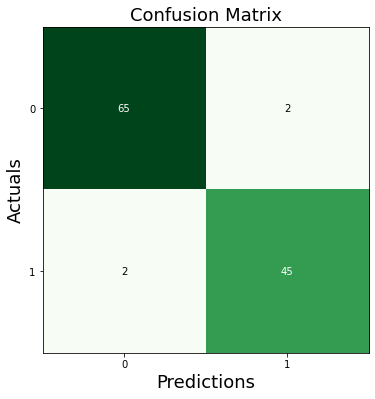

In [27]:
#Plotting the confusion matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [28]:
#Creating a variable and assigning the accuracy score values with help of y_test and y_pred 
logreg=accuracy_score(y_test,y_pred) #Accuracy classification score - This function computes subset accuracy the y predicted for a sample must exactly match with the y_actual
logreg #Printing the accuracy score and multiply with 100 for the percentage value

0.9649122807017544

In [31]:
#ROC curve- is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 
#Auc - area under the ROC curve and it should be maximum as possible for a specific threshold
roc_auc_score(y_test, y_pred) #roc and auc scores - Compute Area Under the Receiver Operating Characteristic Curve from prediction scores.

0.9637980311209908

In [32]:
#Precision- Out of the total actual true results, hw much portion is actually true
#Recall- Out of total actual true values, how much we predicted correctly
#f1-score- Recall + Precision
#Accuracy- Correctly predicted values upon the total values
print(metrics.classification_report(y_test, y_pred)) #Classification report- Build a text report showing the main classification metrics.

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

